<a href="https://colab.research.google.com/github/Raymond-0314/ProgrammingAndApplication/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：家庭收支調查數據分析報告

## 摘要

本報告基於 [政府資料開放平台](https://data.gov.tw/) 提供的 [家庭收支調查資料集](https://data.gov.tw/dataset/6429) ，探討 1976-2022 年間的家庭收支資料，分析每戶平均人數、每戶儲蓄金額、自有住宅率、每戶可支配平均所得與消費支出間的關係。透過數據視覺化與統計分析，了解與分析可能的時局變化。

## 引言

### 背景
家庭收支數據是評估社會經濟發展和民生福祉的重要指標。自1970年代以來，台灣經歷了快速的工業化和經濟轉型，家庭結構也隨之發生變化，顯示出少子化、高齡化和小家庭化的趨勢。這些變化可能會影響家庭的儲蓄、消費行為和居住選擇，例如，自有住宅率的變化可能反映房價的波動或政策的調整。政府開放的平台提供了長期的家庭收支調查數據，涵蓋每戶人數、儲蓄和可支配所得等關鍵指標，為分析社會經濟變遷提供了寶貴的數據基礎。

### 目的
本報告旨在利用1976年至2022年的家庭收支數據，分析台灣家庭經濟行為的長期趨勢及關鍵變數之間的關聯性。

### 待答問題
1. 找出平均每戶人數最高的年份，並觀察平均每戶人數有什麼變化？
2. 找出儲蓄金額最高與最低的年份以及該年度的儲蓄金額，並觀察每戶儲蓄金額的變化？
3. 找出自有住宅率最高的年份，並觀察自有住宅率的變化？
4. 每戶可支配所得平均數和消費支出間的關係？

## 方法

### 數據來源
本研究使用 [政府資料開放平台](https://data.gov.tw/) 提供的 [家庭收支調查資料集](https://data.gov.tw/dataset/6429)，該數據集包含：「年、平均每戶人數-人、平均每戶就業人數-人、每戶可支配所得平均數-元、每人可支配所得平均數-元、每戶可支配所得中位數-元、每人可支配所得中位數-元、消費支出-元、消費傾向-百分比、儲蓄-元、儲蓄率-百分比、住宅坪數平均數-坪、住宅坪數中位數-坪、自有住宅率-百分比」。

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入 [家庭收支調查資料集](https://data.gov.tw/dataset/6429) 數據集並檢視數據概況。
2. 繪製散點圖、折線圖等，分析關鍵變數的變化與關係。

In [2]:
# 匯入程式庫
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

--2025-05-19 05:52:30--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.180.113, 64.233.180.101, 64.233.180.139, ...
Connecting to drive.google.com (drive.google.com)|64.233.180.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-19 05:52:30--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.16.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  71.8MB/s    in 0.3s    

2025-05-19 05:52:34 (7

In [3]:
# 取得資料
url = 'https://quality.data.gov.tw/dq_download_json.php?nid=6429&md5_url=012179cbca9c4ac19949dd0fd10a3a39'
df = pd.read_json(url)
df = df.set_index('年')
#df = df[['每戶可支配所得平均數-元', '每戶可支配所得中位數-元', '消費支出-元', '儲蓄-元', '住宅坪數平均數-坪', '住宅坪數中位數-坪']]
df

,平均每戶人數-人,平均每戶就業人數-人,每戶可支配所得平均數-元,每人可支配所得平均數-元,每戶可支配所得中位數-元,每人可支配所得中位數-元,消費支出-元,消費傾向-百分比,儲蓄-元,儲蓄率-百分比,住宅坪數平均數-坪,住宅坪數中位數-坪,自有住宅率-百分比
年,,,,,,,,,,,,,
1976,5.24,1.92,116297,22194,101336,18967,95714,82.30,20583,17.70,22.5,20,67.36
1977,5.06,1.89,130830,25856,111860,21691,104640,79.98,26190,20.02,23.2,20,68.05
1978,4.92,1.89,155737,31654,136086,26873,122207,78.47,33530,21.53,23.9,21,69.57
1979,4.87,1.93,188407,38687,164260,32801,147459,78.27,40948,21.73,25.0,22,71.62
1980,4.85,1.93,233112,48064,205750,41148,179687,77.08,53425,22.92,26.4,24,73.52
1981,4.79,1.92,266439,55624,233886,46894,199523,74.89,66916,25.11,27.0,25,73.33
1982,4.74,1.88,275250,58070,241100,49226,210906,76.62,64344,23.38,27.8,25,74.24
1983,4.71,1.86,295887,62821,257690,53379,226234,76.46,69653,23.54,28.8,26,74.94
1984,4.68,1.84,314245,67146,275780,56967,243784,77.58,70461,22.42,29.5,28,75.99


## 結果與分析

### 找出平均每戶人數最高的年份，並繪製平均每戶人數的折線圖

In [ ]:
print("平均每戶人數最高的年份是 :", df['平均每戶人數-人'].idxmax(), '年')

平均每戶人數最高的年份是 : 1976 年


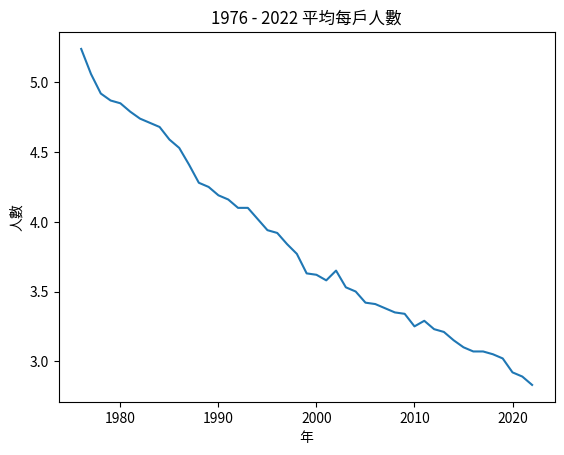

In [ ]:
sns.lineplot(data=df, x='年', y='平均每戶人數-人')
plt.title("1976 - 2022 平均每戶人數")
plt.xlabel("年")
plt.ylabel("人數")
plt.show()

**分析結果**：每戶平均人數越來越少，顯示我國家庭組成逐漸由傳統大家庭轉為小家庭。

### 儲蓄金額變化
找出儲蓄金額最高與最低的年份以及該年度的儲蓄金額，並用折線圖來觀察 1976-2022 年間每戶儲蓄金額的變化。

In [5]:
print("每戶儲蓄金額最高的年份是 :", df['儲蓄-元'].idxmax(), '年，', df['儲蓄-元'].max(), '元')
print("每戶儲蓄金額最低的年份是 :", df['儲蓄-元'].idxmin(), '年，', df['儲蓄-元'].min(), '元')

每戶儲蓄金額最高的年份是 : 2021 年， 275112 元
每戶儲蓄金額最低的年份是 : 1976 年， 20583 元


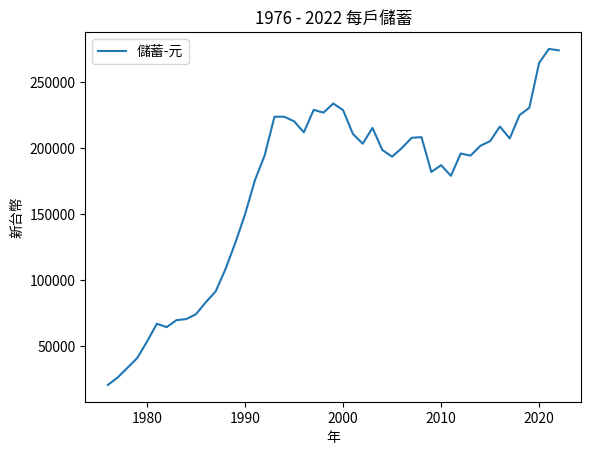

In [9]:
sns.lineplot(data = df[['儲蓄-元']])
plt.title("1976 - 2022 每戶儲蓄")
plt.xlabel("年")
plt.ylabel("新台幣")
plt.show()

**分析結果**：從圖中可以看出，1976-1993 間每戶儲蓄金額急速增加，1993-2000 間大致上無變化，2000-2010 間略為下降，2010-2022 持續增加。

### 自有住宅率變化
找出自有住宅率最高的年份，並使用折線圖觀察自有住宅率的變化。

In [13]:
print("自有住宅率最高的年份是 :", df['自有住宅率-百分比'].idxmax(), '年，', df['自有住宅率-百分比'].max(), '%')

自有住宅率最高的年份是 : 2007 年， 88.14 %


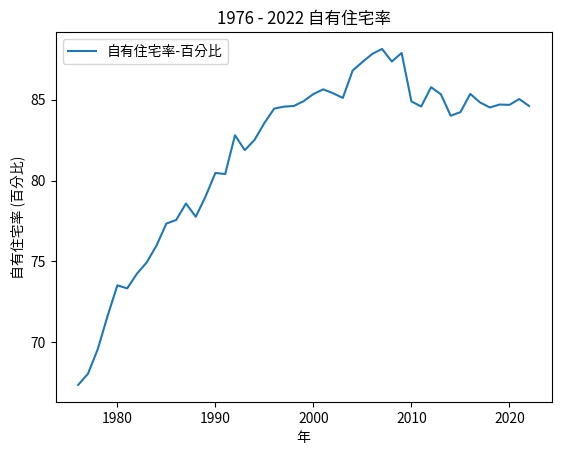

In [11]:
sns.lineplot(data = df[['自有住宅率-百分比']])
plt.title("1976 - 2022 自有住宅率")
plt.xlabel("年")
plt.ylabel("自有住宅率 (百分比)")
plt.show()

**分析結果**：1976-2010 間自有住宅率增加，顯示買房人口有增加的趨勢。但2010年後自有住宅率開始有下降趨勢，顯示可能有人民不買房或是房屋商品化的問題。

### 每戶可支配所得平均數和消費支出間的關係
比較每戶可支配所得平均數和消費支出，使用散佈圖進行分析。

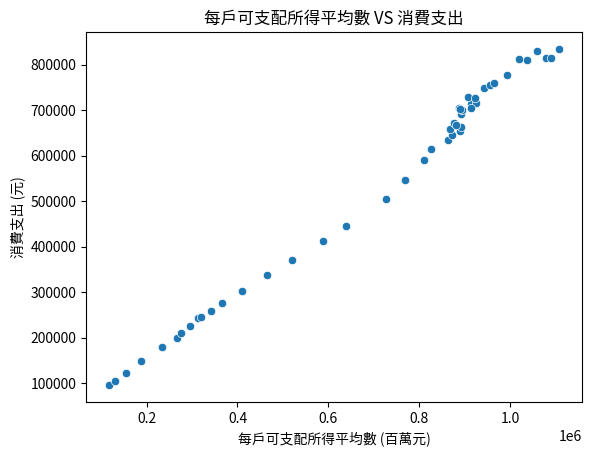

In [12]:
sns.scatterplot(data=df, x='每戶可支配所得平均數-元', y='消費支出-元')
plt.title("每戶可支配所得平均數 VS 消費支出")
plt.xlabel("每戶可支配所得平均數 (百萬元)")
plt.ylabel("消費支出 (元)")
plt.show()

**分析結果**：所得越多，更願意進行消費。

## 結論與建議


### 結論
1. 家庭組成往小家庭方向前進。
2. 1993 年前因經濟起飛而有儲蓄金額增加的趨勢，但到後來有停止的狀況，直到近 10 年才又開始增加。
3. 自有住宅率增加的趨勢符合社會期待，但近年自有住宅率下降的趨勢顯示房市可能有些變化。
4. 每戶可支配所得平均數和消費支出呈現正相關，且大致上呈線性關係。

### 建議
1. 可針對房市狀況做進一步分析，觀察房屋自有率下降的原因。
2. 進一步分析各縣市的家庭收支調查，觀察城鄉之間是否有明顯差距。


